# Aprendizaje de Maquina en el mercado de acciones
## Alejandro Coronado Narváez


### Ciencias de la Computación.

Las tecnicas de aprendizaje de maquina nos permiten explorar la infromación de una forma en la que antes era imposible. Muchos avances se han realizado en lus ultimos años en deep learning y cada vez encontramos más aplicaciones útiles tanto en medicina, reconocimiento de imagen y en data science. Es importante seguir aplicando estas tecnicas cada vez a campos más diversos y comprar los resultados de tal manera que podamos comprender que es lo que sucede en machine learning y cuales son los requsitos necesarios para tener resultados eficientes.

Un area no muy explorada en aprendizaje de maquina es el mercado de acciónes. La principal razón por la que no se ha desarrollado es que el mercado de acciónes es muy volatil y las prediucciones de nuestros codigos no son muy acertados. No obstante, podemos cambiar este enfoque y usar el aprendizaje de maquina como una herramienta para clasificar las acciones en lugar de hacer predicciones. Podemos profundizar cada vez más en esta clasificacoión hasta el punto de saber con un buen intervalo de confianza cuales son las acciones menos riesgosas y con mayores rendimientos o cuales acciones corren riesgo caer.

En el siguiente documuento se exponen un ejercicio con los precios y caracteristicas de las acciones para determinar si una acción puede o no superar al mercado para un dia determinado. Se trata de un problema de clasificación donde la acción sera categorizada como 1 si el cambio porcentual del precio de una acción es mayor que el cambio porcentual en el mercado global. El cambio en el mercado estará determinado por el indice S&P500 que nos da infromación sobre el comportamiento real del mercado.
En el data set tenemos la variable Difference que representa la diferencia en los cambios porcentuales de la accion y el mercado y la variable Status que es la categoria 'Outperform', 'Underperform'asiganada a esta diferencia.

La infromación es obtenida de tres fuentes principales:
* Estadísticas clave para 536 acciones a lo largo de 3 años - Yahoo Finance
* S&P 500 Index - Quandl
* Precio de las acciones ajustadas - Quandl

La base de datos es obtenidad a traves de varios archivos html (para infromación sobre recolección y limpieza de datos consultar el codigo de utils.py) de yahoo finance donde seleccionamos las variables de interes utilizando web scrapping y las API de las paginas de Yahoo y Quandl. Una vez que juntamos la información en una sóla base de datos y eliminamos los valores NA tendremos un total de 3013 obserbaciones correspondientes a X acciones diferentes.

Para cada stock tenemos las siguientes variables que nos ayudar a determinar la categoria a la que pertenecen:
* Total Debt/Equity 
* Trailing P/E
* Price/Sales
* Price/Book
* Profit Margin
* Operating Margin
* Return on Assets
* Return on Equity
* Revenue Per Share
* Market Cap
* Enterprise Value
* Forward P/E
* PEG Ratio
* Enterprise Value/Revenue
* Enterprise Value/EBITDA
* Revenue
* Gross Profit
* EBITDA
* Net Income Avl to Common 
* Diluted EPS
* Earnings Growth
* Revenue Growth
* Total Cash
* Total Cash Per Share
* Total Debt
* Current Ratio
* Book Value Per Share
* Cash Flow
* Beta
* Held by Insiders
* Held by Institutions
* Shares Short (as of
* Short Ratio
* Short % of Float
* Shares
 
Antes de proceder a la etapa de evaluación utilizaremos estandarización sobre lo datos y hacer un análisis descriptivo para interpretar y darle sentido a nuestros datos.

### Análisis Descriptivo.
Cargando Paqueteria:

In [112]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, preprocessing
import pandas as pd
from sklearn import metrics
from sklearn import tree
from matplotlib import style
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
style.use("ggplot")
%matplotlib inline 

Vista de los datos:

In [113]:
data= pd.DataFrame.from_csv("key_stats_acc_perf_NO_NA.csv")
data.head()


,Date,Unix,Ticker,Price,stock_p_change,SP500,sp500_p_change,Difference,DE Ratio,Trailing P/E,...,Book Value Per Share,Cash Flow,Beta,Held by Insiders,Held by Institutions,Shares Short (as of,Short Ratio,Short % of Float,Shares Short (prior,Status
0,2011-08-02 06:45:37,1.312286e+09,a,37.11,-1.48,1254.050049,9.67,-11.15,54.360,16.18,...,11.360,1.420000e+10,1.550,0.25,82.10,4360000.0,1.200,1.40,5420000.0,underperform
1,2013-05-14 00:28:58,1.368509e+09,a,42.44,28.28,1650.339966,14.43,13.85,44.120,13.75,...,15.410,1.320000e+09,1.660,0.23,83.20,4370000.0,1.200,1.30,3080000.0,outperform
2,2013-09-06 06:09:52,1.378466e+09,a,45.91,23.57,1655.170044,20.88,2.69,56.390,17.74,...,14.460,1.260000e+09,1.810,0.23,83.50,2780000.0,1.200,0.80,3300000.0,outperform
3,2004-04-13 04:20:10,1.081848e+09,aa,81.88,-7.28,1129.439941,3.93,-11.21,0.595,24.92,...,14.078,2.530000e+09,1.808,1.00,79.36,12540000.0,2.497,1.46,12700000.0,underperform
4,2004-09-09 16:15:45,1.094765e+09,aa,82.33,-17.75,1118.380005,11.01,-28.76,0.561,20.88,...,14.049,1.780000e+09,1.676,1.00,76.64,7780000.0,1.935,0.90,7930000.0,underperform


In [114]:
data.describe()

,Unix,Price,stock_p_change,SP500,sp500_p_change,Difference,DE Ratio,Trailing P/E,Price/Sales,Price/Book,...,Current Ratio,Book Value Per Share,Cash Flow,Beta,Held by Insiders,Held by Institutions,Shares Short (as of,Short Ratio,Short % of Float,Shares Short (prior
count,3.012000e+03,2966.000000,2948.000000,3012.000000,3012.000000,2948.000000,3012.000000,3012.000000,3012.000000,3012.000000,...,3012.000000,3012.000000,3.012000e+03,3012.000000,3012.000000,3012.000000,3.012000e+03,3012.000000,3012.000000,3.012000e+03
mean,1.250875e+09,42.498594,19.141014,1308.968654,12.915624,6.215397,48.100077,24.084303,2.426215,5.105697,...,2.028825,19.513079,1.004317e+10,1.040633,6.417971,75.007244,1.608617e+07,3.514980,3.632447,1.608493e+07
std,1.167623e+08,47.444454,32.241083,169.422892,6.893404,31.706214,83.323521,36.462119,2.541848,21.465480,...,2.748919,21.599722,2.792551e+10,0.893832,12.408416,18.481798,2.838628e+07,2.947799,4.750873,2.836231e+07
min,1.075297e+09,0.280000,-82.750000,1065.219971,-16.800000,-96.240000,0.000000,1.970000,0.080000,0.160000,...,0.220000,0.070000,7.850000e+02,0.002000,0.000000,0.270000,1.820000e+02,0.191000,0.280000,1.860000e+02
25%,1.107762e+09,21.315000,1.637500,1176.119995,7.200000,-11.405000,0.816500,13.980000,0.960000,1.970000,...,1.136750,9.020000,6.184050e+08,0.540000,0.270000,65.947500,4.000000e+06,1.800000,1.300000,3.970000e+06
50%,1.318133e+09,33.580000,14.855000,1261.150024,12.780000,2.625000,17.740000,18.455000,1.690000,3.010000,...,1.570000,14.312000,1.865000e+09,0.960000,1.000000,78.100000,7.670000e+06,2.700000,2.125000,7.770000e+06
75%,1.348228e+09,51.192500,32.387500,1409.150024,17.700000,18.505000,60.507500,24.520000,2.860000,4.712500,...,2.380000,24.103001,6.980000e+09,1.420000,6.880000,87.000000,1.620250e+07,4.118250,4.070000,1.589500e+07
max,1.378466e+09,737.500000,447.440000,1697.479980,32.380000,429.200000,987.070000,742.670000,25.990000,764.790000,...,128.360000,325.530000,3.573200e+11,35.900000,107.640000,295.600000,3.898200e+08,37.667000,44.900000,3.997900e+08


Como podemos ver no todas las variables estan en la misma escala y hay algunas como el caso de Unix (un formato de fecha) que no nos dan información reelevante para aprendizaje de Maquina. Debemos eliminar estas variables e identificar que tan correlacionadas se encuentran el resto de las variables.
Primero estandarizaremos nuestros datos para poder efectuar un análisis descriptivo más eficiente:


In [115]:
for i in data.columns:
    if type(data[i][1]) ==str:
        print('Variable no numerica')
    else:
        media=np.mean(data[i])
        std=np.std(data[i])
        data_std=( data[i] - media)/ std
        data[i]=data_std

Variable no numerica
Variable no numerica
Variable no numerica


Tambien eliminaremos las variables que sirven para construir la variable categorica y que no pdriamos conocer a priori. 
Un ejemplo de estos caso es el cambio en el indice de S&P500, podemos conocer el valor inicial y solo al final del día podriamos conocer el cambio, sin em,bargo, en la vida cotidiana no podríamos esperar al final del día para asignarle un valor a esta variable ya que el mercado estaría cerrado y el objetivo de nuestro mdelo es conocer las acciones que nos den buenos rendimientos o que podrán superar al mercado.


In [116]:
del data['Unix'] 
del data['stock_p_change']
del data['sp500_p_change']
data.describe()


,Price,SP500,Difference,DE Ratio,Trailing P/E,Price/Sales,Price/Book,Profit Margin,Operating Margin,Return on Assets,...,Current Ratio,Book Value Per Share,Cash Flow,Beta,Held by Insiders,Held by Institutions,Shares Short (as of,Short Ratio,Short % of Float,Shares Short (prior
count,2.966000e+03,3.012000e+03,2.948000e+03,3.012000e+03,3.012000e+03,3.012000e+03,3.012000e+03,3.012000e+03,3.012000e+03,3.012000e+03,...,3.012000e+03,3.012000e+03,3.012000e+03,3.012000e+03,3.012000e+03,3.012000e+03,3.012000e+03,3.012000e+03,3.012000e+03,3.012000e+03
mean,-2.302571e-15,1.745571e-14,-5.088554e-16,1.812461e-15,-1.957017e-15,-1.983528e-16,5.112942e-16,2.117238e-16,4.129794e-16,-2.191253e-15,...,3.700375e-16,-2.070463e-15,-4.594598e-17,1.143139e-15,-1.198761e-15,8.694241e-15,1.065254e-17,1.305802e-15,2.307311e-15,3.409549e-17
std,1.000169e+00,1.000166e+00,1.000170e+00,1.000166e+00,1.000166e+00,1.000166e+00,1.000166e+00,1.000166e+00,1.000166e+00,1.000166e+00,...,1.000166e+00,1.000166e+00,1.000166e+00,1.000166e+00,1.000166e+00,1.000166e+00,1.000166e+00,1.000166e+00,1.000166e+00,1.000166e+00
min,-8.900031e-01,-1.438939e+00,-3.231946e+00,-5.773647e-01,-6.066015e-01,-9.231884e-01,-2.304406e-01,-1.228568e+00,-1.569847e+00,-1.686806e+00,...,-6.581226e-01,-9.003036e-01,-3.597012e-01,-1.162193e+00,-5.173132e-01,-4.044501e+00,-5.667760e-01,-1.127802e+00,-7.057658e-01,-5.672111e-01
25%,-4.465678e-01,-7.842548e-01,-5.558338e-01,-5.675640e-01,-2.771638e-01,-5.769261e-01,-1.461052e-01,-6.478926e-01,-7.334235e-01,-7.030636e-01,...,-3.245725e-01,-4.858776e-01,-3.375527e-01,-5.601905e-01,-4.955501e-01,-4.902796e-01,-4.258458e-01,-5.818799e-01,-4.910328e-01,-4.272199e-01
50%,-1.880114e-01,-2.822911e-01,-1.132587e-01,-3.644243e-01,-1.544133e-01,-2.896858e-01,-9.764726e-02,-2.636806e-01,-2.035959e-01,-1.867943e-01,...,-1.669389e-01,-2.408338e-01,-2.929053e-01,-9.022526e-02,-4.367093e-01,1.673684e-01,-2.965366e-01,-2.765167e-01,-3.173516e-01,-2.932170e-01
75%,1.832748e-01,5.914077e-01,3.876744e-01,1.489313e-01,1.195130e-02,1.706856e-01,-1.832069e-02,3.927805e-01,5.184331e-01,5.207583e-01,...,1.277713e-01,2.125344e-01,-1.097090e-01,4.244985e-01,3.724128e-02,6.490033e-01,4.098668e-03,2.046850e-01,9.211482e-02,-6.697734e-03
max,1.465121e+01,2.293526e+00,1.334301e+01,1.127084e+01,1.971101e+01,9.271874e+00,3.539685e+01,9.624431e+00,4.300865e+00,5.984040e+00,...,4.596431e+01,1.416998e+01,1.243789e+01,3.900640e+01,8.158885e+00,1.193766e+01,1.316819e+01,1.158753e+01,8.687752e+00,1.353094e+01


In [117]:
lista=['Short % of Float', 'Earnings Growth', 'Market Cap', 'Enterprise Value', 'PEG Ratio', 'Price', 'Forward P/E', 'Net Income Avl to Common ', 'Trailing P/E', 'Operating Margin', 'Gross Profit', 'Profit Margin', 'Held by Institutions', 'Held by Insiders', 'Short Ratio', 'Revenue', 'Enterprise Value/Revenue', 'Revenue Per Share', 'Cash Flow', 'Price/Sales', 'Return on Assets', 'Revenue Growth', 'SP500', 'Shares Short (prior ', 'Shares Short (as of', 'Total Cash', 'Diluted EPS', 'DE Ratio', 'Total Debt', 'Current Ratio', 'Total Cash Per Share', 'Enterprise Value/EBITDA', 'EBITDA', 'Beta', 'Price/Book', 'Book Value Per Share', 'Return on Equity']

En estas graficas podemos ver la distribución de los datos para cada una de las variables. Los puntos azules indican que hay pocas concentraciones en los extremos pientras que las zonas amarillas y rojas nos dicen que hay una gran concentración de valores en esos conjuntos de datos.
Podmeos Comprar la correlación dentre variables independientes y tambien la correlación de las variables independientes con las dependientes. Con esta información podemos concluir:
* Difference esta positiva y significativamente correlacionada con Short % of Float. 
* Difference esta positiva y significativamente correlacionada con Earnings Growth.
* Difference esta positiva y significativamente correlacionada con Market Cap.
* Hay una relación muy alta entre el precio y el indice S&P500.
Para comprabar estas hipotesis pasaremos a la selección y filtrado de variables

In [118]:
print len(data)
data=data.dropna(axis=0)
print len(data)

3012
2948


#### FCB Filtering
Ya que tenemos los datos estandarizados nos gustaría seleccionar solo aquellas variables que aporten mucha información a nuestra variable categorica. Para determinar que variable aportan información utilizaremos la correlación de las variables independientes con las variable de interes. En este caso utilizaremos la variable Difference y la compraremos con las variables independientes. Una vez que tengamos las variables independientes que aportan mayor infromación las ordenaremos de mayor a menor y eliminaremos aquellas variables independientes que esten muy correlacionadas con las variables de mayor valor.
Este filtrado se llama FCB Filtering y nos tiene la ventaja de mantener la integridad de la infromación y descartar aquellos valores que solo generan ruido en nuestro modelo:


In [119]:

       
def FCB_filtering(data, y, parametro):
    listaEliminar=list()
    corrY=list()
    names=list()
    #Primero definimos el orden utilizando la correlación con y 
    for i in data :

        if isinstance(data[i][1], str) :
            print('valores no numericos')
        else:
            #print('CORRELACION de {}: {}'.format(i, np.abs(np.corrcoef( data[i] , y ))[1,0] ))
            corrY.append(  np.abs(np.corrcoef( data[i] , y )[1,0] ) )
            names.append(i)    

    order= [names for (corrY,names) in sorted(zip(corrY,names) ,  reverse=True )]
    print 'ORDEN DE CORERELACION CON Y: {}'.format(order )
    
    lista2=list()
    for i in order:
        lista2.append(i)
        if isinstance(data[i][1], str) :
                print('datos no numericos')
        else:
            for j in order:
                if( data[j].name in lista2 or type(data[j][1])==str ):
                    #print('datos no numericos o en lista')
                    pass
                    
                else:
                    if data[i].name==data[j].name:
                        print('variables iguales')
                    else:
                        #print'CORRELACION CON {}: {}'.format(j, np.abs(np.corrcoef( data[i] , data[j])[1,0] ))
                                
                        if( np.abs(np.corrcoef( data[i] , data[j])[1,0] ) > parametro):
                            listaEliminar.append(j)
    
    print 'VARIABLES A ELIMINAR: {}'.format(listaEliminar)                   
    for i in list(set(listaEliminar)):
        print'Eliminando:  {}'.format(i)
        data=data.drop(i, 1)
    return data
                

y=data['Difference']
del data['Difference']
data=FCB_filtering(data, y , .9)



valores no numericos
valores no numericos
valores no numericos
ORDEN DE CORERELACION CON Y: ['Short % of Float', 'Earnings Growth', 'Market Cap', 'Enterprise Value', 'PEG Ratio', 'Price', 'Forward P/E', 'Net Income Avl to Common ', 'Trailing P/E', 'Operating Margin', 'Gross Profit', 'Profit Margin', 'Held by Institutions', 'Held by Insiders', 'Short Ratio', 'Revenue', 'Enterprise Value/Revenue', 'Revenue Per Share', 'Cash Flow', 'Price/Sales', 'Return on Assets', 'Revenue Growth', 'SP500', 'Shares Short (prior ', 'Shares Short (as of', 'Total Cash', 'Diluted EPS', 'DE Ratio', 'Total Debt', 'Current Ratio', 'Total Cash Per Share', 'Enterprise Value/EBITDA', 'EBITDA', 'Beta', 'Price/Book', 'Book Value Per Share', 'Return on Equity']
VARIABLES A ELIMINAR: ['Enterprise Value', 'Net Income Avl to Common ', 'Gross Profit', 'Gross Profit', 'Enterprise Value/Revenue', 'Price/Sales', 'Price/Sales', 'Shares Short (as of', 'EBITDA']
Eliminando:  Net Income Avl to Common 
Eliminando:  Price/Sales


In [120]:
data.describe()
data.columns

Index([u'Date', u'Ticker', u'Price', u'SP500', u'DE Ratio', u'Trailing P/E',
       u'Price/Book', u'Profit Margin', u'Operating Margin',
       u'Return on Assets', u'Return on Equity', u'Revenue Per Share',
       u'Market Cap', u'Forward P/E', u'PEG Ratio', u'Enterprise Value/EBITDA',
       u'Revenue', u'Diluted EPS', u'Earnings Growth', u'Revenue Growth',
       u'Total Cash', u'Total Cash Per Share', u'Total Debt', u'Current Ratio',
       u'Book Value Per Share', u'Cash Flow', u'Beta', u'Held by Insiders',
       u'Held by Institutions', u'Short Ratio', u'Short % of Float',
       u'Shares Short (prior ', u'Status'],
      dtype='object')

Eliminamos X variables que tenian una correlación mayor a .9 con variables significativas. Ahora podemos aplicar Aprendizaje de Maquina a nuestros datos y comprar resultados.

In [121]:
data.columns
#del data['Difference']
data[ data.columns[20:30] ].describe()


,Total Cash,Total Cash Per Share,Total Debt,Current Ratio,Book Value Per Share,Cash Flow,Beta,Held by Insiders,Held by Institutions,Short Ratio
count,2948.000000,2948.000000,2948.000000,2948.000000,2948.000000,2948.000000,2948.000000,2948.000000,2948.000000,2948.000000
mean,-0.024756,0.000823,0.001128,-0.005378,-0.042073,-0.015513,-0.004072,-0.001775,-0.001067,0.004045
std,0.954332,1.010952,1.010197,1.005473,0.815669,0.967431,1.007310,0.994068,1.002359,0.993015
min,-0.430228,-0.037929,-0.310067,-0.658123,-0.900304,-0.359701,-1.162193,-0.517313,-4.044501,-1.127802
25%,-0.396134,-0.037929,-0.282948,-0.327028,-0.485241,-0.337571,-0.571380,-0.495550,-0.492850,-0.579420
50%,-0.322528,-0.037929,-0.208757,-0.170577,-0.241528,-0.294338,-0.101415,-0.436709,0.161957,-0.276517
75%,-0.093536,-0.037929,-0.000662,0.120495,0.207302,-0.121528,0.424499,0.039659,0.649003,0.224279
max,13.978498,32.008900,18.412231,45.964308,14.169985,12.437891,39.006403,8.158885,11.937658,11.587525


### Aprendizaje de Máquina y modelado
Primero nos guataría ver los resultados del ejercicio anterior en una regresión lineal. Este modelo nos permitira hacer un check sobre nuestros datos y los coeficientes deberían ser altos para 'Short % of Float', 'Earnings Growth', 'Market Cap', 'Enterprise Value', 'PEG Ratio'.
Vamos a dividir nuestro conjunto de datos en entrenamiento y prueba para proceder con el analisis. Asimismo convertiremos la variable y en una variable numérca.


In [122]:
print('CARGANDO DATOS')
z=data
data = data.replace("NaN",0).replace("N/A",0)
y = (data['Status']
         .replace("underperform",0)
         .replace("outperform",1)
         .values.tolist())
for i in data.columns:
    if type(data[i][1])==str:
        del data[i]
        

X = data
input_size=len(data.columns)
X_train, X_test, Y_train, Y_test = train_test_split(X, y , train_size=0.75)


CARGANDO DATOS


In [95]:
import time
import statsmodels.formula.api as sm
#print('GENERANDO MODELOS')

t1=time.time()
model = svm.SVC(kernel="linear", C= 1.0)
model.fit(X_train,Y_train)
y_model = model.predict(X_test)
t2=time.time()


print(' Capacidad de prediccion Modelo Lineal :  {}'.format(accuracy_score(Y_test, y_model)))
print ('\n \tMétricas clasicas de Clasificadores: ' )
print(metrics.classification_report(y_model, Y_test))
print('\n Tiempo de Procesamiento: {} '.format(t2-t1) )



 Capacidad de prediccion Modelo Lineal :  0.590230664858

 	Métricas clasicas de Clasificadores: 
             precision    recall  f1-score   support

          0       0.27      0.67      0.39       142
          1       0.88      0.57      0.69       595

avg / total       0.76      0.59      0.63       737


 Tiempo de Procesamiento: 0.827505111694 


In [96]:
print(sm.OLS(y, X).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     2.205
Date:                Sat, 03 Dec 2016   Prob (F-statistic):           0.000177
Time:                        23:35:44   Log-Likelihood:                -3252.9
No. Observations:                2948   AIC:                             6566.
Df Residuals:                    2918   BIC:                             6745.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Price                     

In [102]:
import time
t1=time.time()
model = tree.DecisionTreeClassifier()
model = model.fit(X_train, Y_train)
y_model = model.predict(X_test)
t2=time.time()

print(' Capacidad de prediccion Tree :  {}'.format(accuracy_score(Y_test, y_model)))
print ('\n \tMétricas clasicas de Clasificadores: ' )
print(metrics.classification_report(y_model, Y_test))
print('\n Tiempo de Procesamiento: {} '.format(t2-t1) )




 Capacidad de prediccion Tree :  0.706919945726

 	Métricas clasicas de Clasificadores: 
             precision    recall  f1-score   support

          0       0.64      0.71      0.67       314
          1       0.77      0.70      0.73       423

avg / total       0.71      0.71      0.71       737


 Tiempo de Procesamiento: 0.0691230297089 


In [104]:

model = tree.DecisionTreeClassifier()
model = model.fit(data, y)
tree.export_graphviz(model, out_file='dataClassification.dot', feature_names=data.columns) 



In [103]:
data.columns

Index([u'Price', u'SP500', u'DE Ratio', u'Trailing P/E', u'Price/Book',
       u'Profit Margin', u'Operating Margin', u'Return on Assets',
       u'Return on Equity', u'Revenue Per Share', u'Market Cap',
       u'Forward P/E', u'PEG Ratio', u'Enterprise Value/EBITDA', u'Revenue',
       u'Diluted EPS', u'Earnings Growth', u'Revenue Growth', u'Total Cash',
       u'Total Cash Per Share', u'Total Debt', u'Current Ratio',
       u'Book Value Per Share', u'Cash Flow', u'Beta', u'Held by Insiders',
       u'Held by Institutions', u'Short Ratio', u'Short % of Float',
       u'Shares Short (prior '],
      dtype='object')

In [64]:
t2=time.time()
model = RandomForestClassifier(n_estimators=400)
model.fit(X_train, Y_train)
y_model = model.predict(X_test)
t2=time.time()


print(' Capacidad de prediccion Random Forest :  {}'.format(accuracy_score(Y_test, y_model)))
print ('\n \tMétricas clasicas de Clasificadores: ' )
print(metrics.classification_report(y_model, Y_test))
print('\n Tiempo de Procesamiento: {} '.format(t2-t1) )






 Capacidad de prediccion Random Forest :  0.781546811398

 	Métricas clasicas de Clasificadores: 
             precision    recall  f1-score   support

          0       0.75      0.74      0.75       317
          1       0.81      0.81      0.81       420

avg / total       0.78      0.78      0.78       737


 Tiempo de Procesamiento: 8882.05734611 


In [ ]:
#Random Forest 

In [60]:
listaX=list()
listaY=list()

for i in range(25):
    sumaX=0
    sumaY=0
    for j in range(15):
        nArboles=(i+1)*30
        t2=time.time()
        model = RandomForestClassifier(n_estimators= nArboles)
        model.fit(X_train, Y_train)
        y_model = model.predict(X_test)
        t2=time.time()
        sumaY=sumaY+ accuracy_score(Y_test, y_model)
        sumaX=sumaX+(t2-t1)
    
    listaY.append(sumaY/10)
    listaX.append(sumaX/10)
    



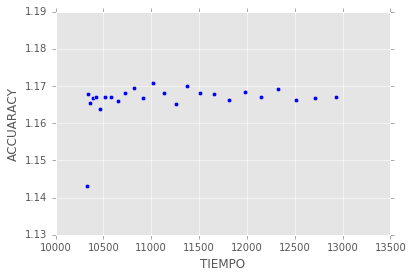

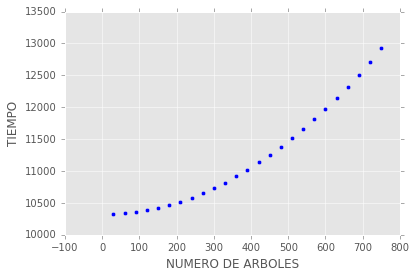

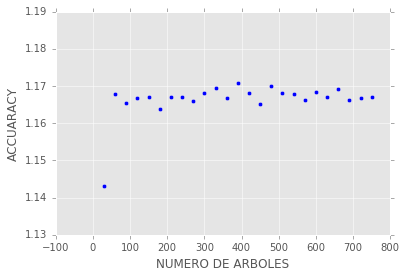

In [63]:
fig, ax = plt.subplots()
ax.scatter( listaX, listaY)
ax.set_xlabel('TIEMPO')
ax.set_ylabel('ACCUARACY')

nArboles=[(i+1)*30 for i in range(25)]
fig, ax = plt.subplots()
ax.scatter( nArboles, listaX)
ax.set_xlabel('NUMERO DE ARBOLES')
ax.set_ylabel('TIEMPO')

fig, ax = plt.subplots()
ax.scatter( nArboles, listaY)
ax.set_xlabel('NUMERO DE ARBOLES')
ax.set_ylabel('ACCUARACY')



In [67]:
len(X_train.columns)

30

### Conclusiones

In [124]:

print len(X)
print len(y)
y=pd.DataFrame(y)
X.to_csv('dataX.csv')
y.to_csv('datay.csv')

2948
2948


In [78]:
y=pd.DataFrame(y)